<a href="https://colab.research.google.com/github/Pranjal-bisht/DecisionTree-classifier/blob/main/GRIPtask5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP TASK 5 : DECISION TREE CLASSSIFIER**


In ‘Iris’ dataset we have to create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


**IMPORTING LIBRARIES**

In [2]:
#Importing libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import datasets
import seaborn as sns

**LOADING IRIS DATASET FROM SKLEARN**

In [3]:
#Loading the data set from Sklearn 
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

**DATA PRE-PROCESSING**

In [4]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [5]:
data['species']=iris['target']
data['species']=data['species'].apply(lambda x:iris['target_names'][x])

In [6]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Data visualization**

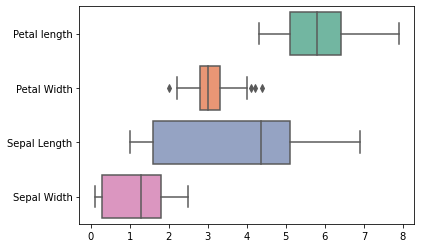

In [8]:
sns.boxplot(data=data, orient="h", palette="Set2")

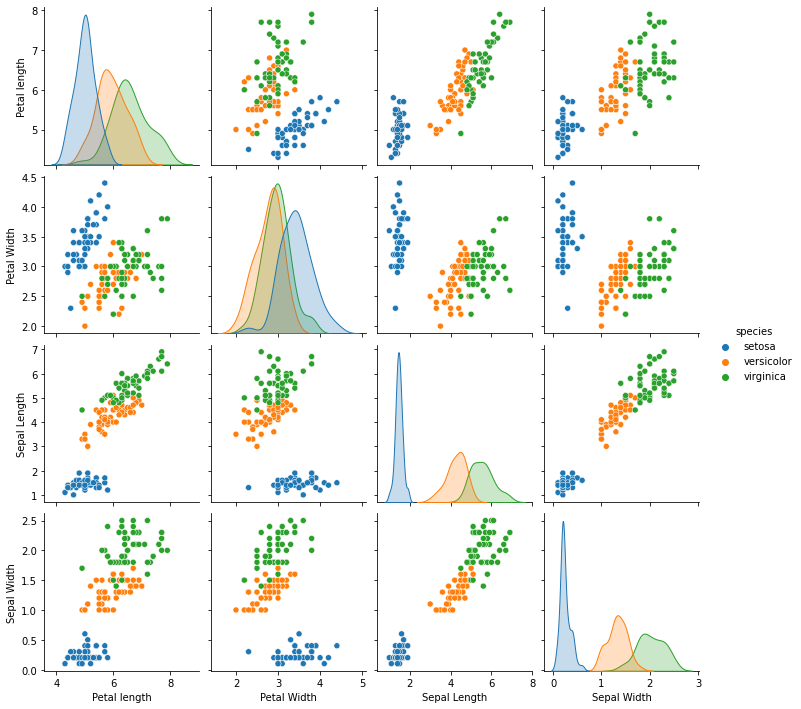

In [9]:
sns.pairplot(data,hue='species')
plt.show()

We can easily observe that "iris-setosa" makes a distinctive cluster in every parameter, while the other two species are overlapping a bit on each other

In [20]:
data.corr()

,Petal length,Petal Width,Sepal Length,Sepal Width
Petal length,1.000000,-0.117570,0.871754,0.817941
Petal Width,-0.117570,1.000000,-0.428440,-0.366126
Sepal Length,0.871754,-0.428440,1.000000,0.962865
Sepal Width,0.817941,-0.366126,0.962865,1.000000


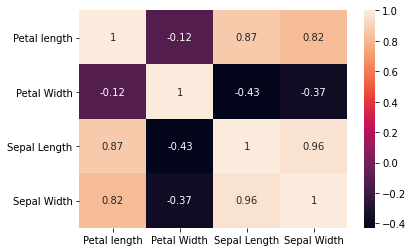

In [10]:
sns.heatmap(data.corr(),annot=True)
plt.show()

1. sepal length and sepal width are highly correlated.
2. petal length is highly correlated with sepal length and sepal width.

**MODEL PREPARATION**

In [11]:

from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.3)

In [12]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.species

In [13]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.species

**DECISION TREE CLASSIFIER**

In [14]:
DT = DecisionTreeClassifier(random_state=0)
model = DT.fit(train_X,train_y)

In [15]:
y_pred = DT.predict(test_X)
y_pred

array(['setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa'], dtype=object)

**ACCURACY**

In [21]:
from sklearn import metrics 
print("Accuracy score:",metrics.accuracy_score(test_y,y_pred)*100)

Accuracy score: 93.33333333333333


**VISUALISATION OF THE DECISION TREE**

In [17]:

!pip install pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


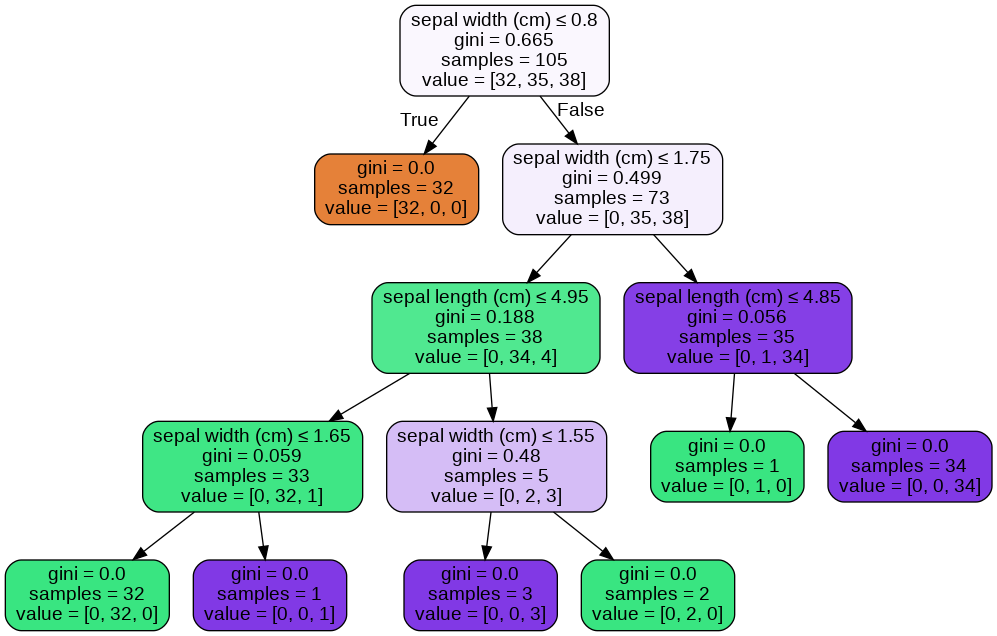

In [18]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())